# Deep Neural Network of the CIFAR10 image dataset

# Import Libraries

In [1]:
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 8A

In [2]:
# Load CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Split the full training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=2442)

In [4]:
X_train.shape

(40000, 32, 32, 3)

In [6]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [7]:
def make_model(lr):
    # Create a Sequential model
    model = tf.keras.Sequential()

    # Add input layer
    model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))

    # Add 20 hidden layers
    for _ in range(20):
        model.add(tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    
    # PART B
    # Add output layer with 10 output with softmax
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model


# 8B

I created the first model (model1) where I used callbacks to save the learning rates and loss to see what the best learning rate is. I also used early stopping with a patience of 5.

In [11]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Learning Rate
expon_lr = ExponentialLearningRate(factor=1.001)

In [12]:
model1 = make_model(1e-5)
model1.fit(X_train, y_train, epochs=25,
          validation_data=(X_valid, y_valid),
          callbacks = [expon_lr, early_stopping])

Epoch 1/25
1250/1250 [==============================] - 21s 11ms/step - loss: 8.9881 - accuracy: 0.1369 - val_loss: 2.4111 - val_accuracy: 0.1841
Epoch 2/25
1250/1250 [==============================] - 13s 10ms/step - loss: 2.2263 - accuracy: 0.2093 - val_loss: 2.1361 - val_accuracy: 0.2182
Epoch 3/25
1250/1250 [==============================] - 12s 10ms/step - loss: 2.0611 - accuracy: 0.2463 - val_loss: 2.1000 - val_accuracy: 0.2510
Epoch 4/25
1250/1250 [==============================] - 13s 11ms/step - loss: 2.0156 - accuracy: 0.2531 - val_loss: 2.1403 - val_accuracy: 0.2244
Epoch 5/25
1250/1250 [==============================] - 13s 10ms/step - loss: 3.3142 - accuracy: 0.1956 - val_loss: 2.3293 - val_accuracy: 0.0995
Epoch 6/25
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3374 - accuracy: 0.0996 - val_loss: 2.3863 - val_accuracy: 0.1040
Epoch 7/25
1250/1250 [==============================] - 13s 10ms/step - loss: 2.3994 - accuracy: 0.1016 - val_loss: 2.4555 - 

Text(0, 0.5, 'Loss')

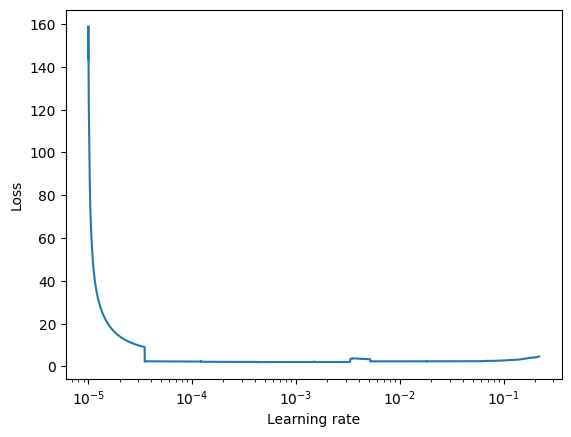

In [19]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.xlabel("Learning rate")
plt.ylabel("Loss")

Based on the figure above, it seems that the loss approaches a minimum around 4e-5 so this is what I chose as the best learning rate.

In [20]:
model2 = make_model(4e-5)

model2.fit(X_train, y_train, epochs=50,
          validation_data=(X_valid, y_valid),
          callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 19s 10ms/step - loss: 7.6125 - accuracy: 0.1548 - val_loss: 2.2553 - val_accuracy: 0.2005
Epoch 2/50
1250/1250 [==============================] - 12s 10ms/step - loss: 2.1479 - accuracy: 0.2230 - val_loss: 2.0533 - val_accuracy: 0.2450
Epoch 3/50
1250/1250 [==============================] - 13s 10ms/step - loss: 2.0120 - accuracy: 0.2617 - val_loss: 1.9612 - val_accuracy: 0.2797
Epoch 4/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.9204 - accuracy: 0.2968 - val_loss: 1.8844 - val_accuracy: 0.3148
Epoch 5/50
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8524 - accuracy: 0.3274 - val_loss: 1.8099 - val_accuracy: 0.3361
Epoch 6/50
1250/1250 [==============================] - 12s 9ms/step - loss: 1.7984 - accuracy: 0.3469 - val_loss: 1.7913 - val_accuracy: 0.3477
Epoch 7/50
1250/1250 [==============================] - 12s 10ms/step - loss: 1.7520 - accuracy: 0.3654 - val_loss: 1.7359 - v

In [26]:
model2.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 4ms/step - loss: 1.5496 - accuracy: 0.4493


[1.549620270729065, 0.44929999113082886]

# 8C

In [24]:
# Create a Sequential model
model3 = tf.keras.Sequential()

# Add input layer
model3.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))

# Add 20 hidden layers
for _ in range(20):
    model3.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model3.add(tf.keras.layers.BatchNormalization())
    model3.add(tf.keras.layers.Activation("elu"))

# Add output layer with 10 output with softmax
model3.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=4e-5)
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [25]:
model3.fit(X_train, y_train, epochs=50,
          validation_data=(X_valid, y_valid),
          callbacks=early_stopping)

Epoch 1/50
1250/1250 [==============================] - 38s 17ms/step - loss: 2.1296 - accuracy: 0.2490 - val_loss: 1.8784 - val_accuracy: 0.3276
Epoch 2/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.8481 - accuracy: 0.3389 - val_loss: 1.8045 - val_accuracy: 0.3585
Epoch 3/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.7488 - accuracy: 0.3776 - val_loss: 1.7081 - val_accuracy: 0.3938
Epoch 4/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.6848 - accuracy: 0.3997 - val_loss: 1.6688 - val_accuracy: 0.4014
Epoch 5/50
1250/1250 [==============================] - 22s 18ms/step - loss: 1.6375 - accuracy: 0.4184 - val_loss: 1.6613 - val_accuracy: 0.4093
Epoch 6/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.6011 - accuracy: 0.4299 - val_loss: 1.6277 - val_accuracy: 0.4190
Epoch 7/50
1250/1250 [==============================] - 21s 16ms/step - loss: 1.5645 - accuracy: 0.4440 - val_loss: 1.5594 -

In [27]:
model3.evaluate(X_valid, y_valid)

313/313 [==============================] - 2s 5ms/step - loss: 1.5114 - accuracy: 0.4712


[1.5113905668258667, 0.47119998931884766]

The model with batch normalization (BN) does converge faster as it only took 24 epochs to train while the model without BN took 30 epochs to train. Also, the model with BN got to the highest accuracy than the model without BN within only 19 epochs compared to the total 30 epochs for the model without BN. 
The model with BN produced a better model with a validation accuacy of 47% while the model without BN produced 45%. That being said, both models do not predict the data well.
Using BN, the time of each epoch was slightly more than without BN due to more comptuations, but the model with BN still converged and trained faster than the model without BN.